# Comparison CellRank on RNA vs. MultiVelo + CellRank on RNA+ATAC
## Pathways analysis


In [111]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
data_path = '../data'
plot_path = '../plots'
result_fold = os.path.join(data_path, 'results')

In [113]:
plot_params = {
    'dpi': 300,
    'facecolor':'white',
    'bbox_inches':'tight',
}

## Pathways analysis

In [4]:
specific_rows = list(range(9,30))

def get_df(fn):
    df = pd.read_table(os.path.join(result_fold, fn), skiprows = lambda x: x not in specific_rows)
    df = df[['Gene Set Name', 'k/K', 'FDR q-value']] 
    df['neglog_FDR'] = - np.log10(df['FDR q-value'])
    
    return df

In [102]:
def plot_FDR_comparison(df0, df1, title, fname=None, neglog=True, **plot_params):
    FDR_name = 'neglog_FDR' if neglog else 'FDR q-value'
    kK_name = 'k/K'

    gsn_0 = list(df0['Gene Set Name'].values)
    gsn_1 = list(df1['Gene Set Name'].values)

    common_gsn = set(gsn_0).intersection(gsn_1)
    missing_gsn_in_0 = set(gsn_1) - set(gsn_0) 
    missing_gsn_in_1 = set(gsn_0) - set(gsn_1) 

    index = []
    for gsn in common_gsn:
        index.append(gsn)

    for gsn in missing_gsn_in_1:
        index.append(gsn)

    for gsn in missing_gsn_in_0:
        index.append(gsn)

    FDR_data0 = []
    kK_data0 = []
    for gsn in index:
        if gsn in gsn_0:
            FDR_data0.append(df0[df0['Gene Set Name'] == gsn][FDR_name].iloc[0])
            kK_data0.append(df0[df0['Gene Set Name'] == gsn][kK_name].iloc[0])
        else:
            FDR_data0.append(None)
            kK_data0.append(None)

    FDR_data1 = []
    kK_data1 = []
    for gsn in index:
        if gsn in gsn_1:
            FDR_data1.append(df1[df1['Gene Set Name'] == gsn][FDR_name].iloc[0])
            kK_data1.append(df1[df1['Gene Set Name'] == gsn][kK_name].iloc[0])
        else:
            FDR_data1.append(None)
            kK_data1.append(None)

    idx_sort = np.argsort([-1 if x is None else x for x in kK_data0])[::-1]
    FDR_data0 = np.array(FDR_data0)[idx_sort]
    FDR_data1 = np.array(FDR_data1)[idx_sort]
    kK_data0 = np.array(kK_data0)[idx_sort]
    kK_data1 = np.array(kK_data1)[idx_sort]
    index = np.array(index)[idx_sort]

    fig, axes = plt.subplots(figsize=(12,5), ncols=2, sharey=True)
    fig.tight_layout()
    x_axis = np.arange(len(index))
    
    kK_min = min([1e10 if x is None else x for x in kK_data0]+[1e10 if x is None else x for x in kK_data1])
    kK_max = max([-1 if x is None else x for x in kK_data0]+[-1 if x is None else x for x in kK_data1])

    vmin = min([1e10 if x is None else x for x in FDR_data0]+[1e10 if x is None else x for x in FDR_data1])
    vmax = max([-1 if x is None else x for x in FDR_data0]+[-1 if x is None else x for x in FDR_data1])
    
    axes[0].scatter(kK_data0, x_axis, s=100, c=FDR_data0, cmap='plasma', vmin=vmin, vmax=vmax)
    axes[0].set_title('RNA') #, fontsize=18, pad=15, color=color_red, **hfont)
    axes[0].set_xlim(0, 1.1*kK_max)
    
    
    axp = axes[1].scatter(kK_data1, x_axis, s=100, c=FDR_data1, cmap='plasma', vmin=vmin, vmax=vmax)
    axes[1].set_xlim(0, 1.1*kK_max)
    axes[1].set_title('RNA+ATAC') #, fontsize=18, pad=15, color=color_blue, **hfont)
    
    plt.gca().invert_yaxis()

    axes[0].set(yticks=x_axis, yticklabels=index)
    axes[0].yaxis.tick_left()
    axes[0].tick_params(axis='y') #, colors='white') # tick color
    axes[0].set_xlabel('Fold Enrichment')
    axes[1].set_xlabel('Fold Enrichment')

    cb = plt.colorbar(axp,ax=axes,location='right', pad=0.02)
    cb.set_label(neglog*'NegLog' +'FDR', rotation=270, labelpad=15)
    
    plt.suptitle(title, y=1.05, fontsize=15)
    
    if fname:
        plt.savefig(os.path.join(plot_path, fname), **plot_params)
        print(f'Plot saved in {fname}')
    plt.show()

Plot saved in pathways_term_state_0.png


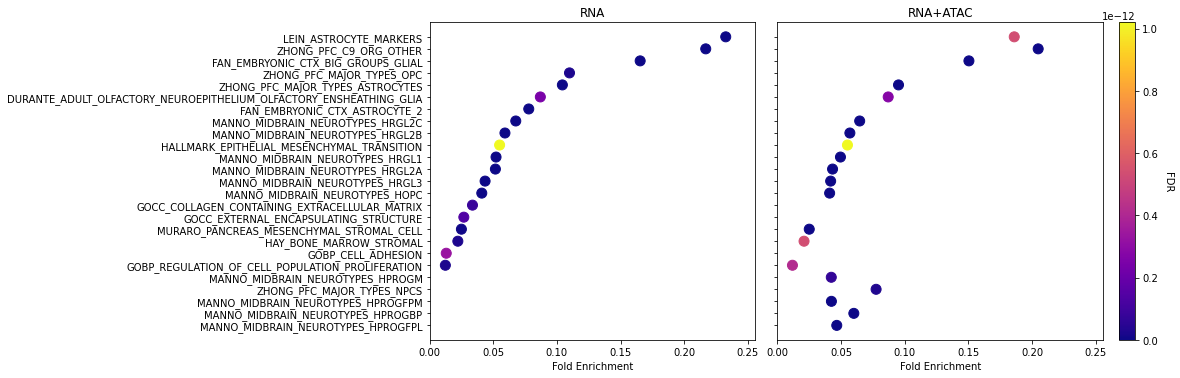

In [107]:
df0 = df_rna_0
df1 = df_result_0
title = '' # 'Terminal State 0'
fname = 'pathways_term_state_0.png'
neglog = False
plot_FDR_comparison(df0, df1, title, fname, neglog=neglog, **plot_params)

Plot saved in pathways_term_state_0_neglog.png


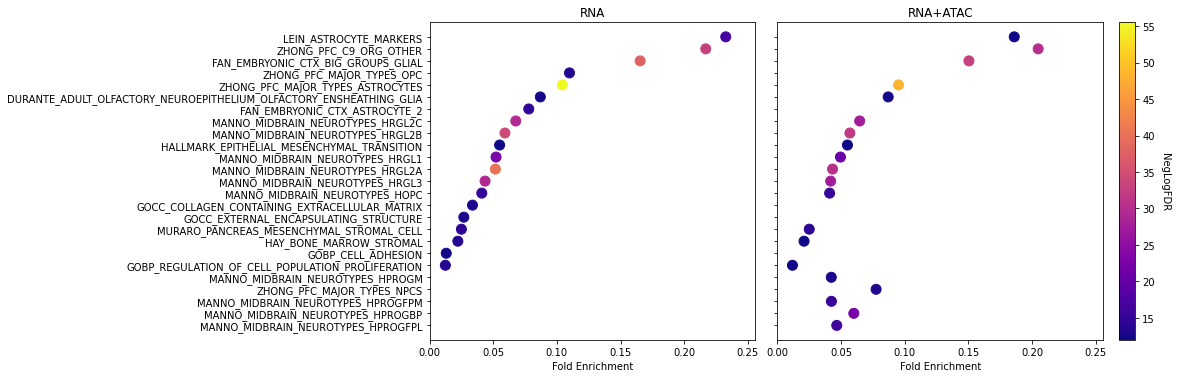

In [108]:
df0 = df_rna_0
df1 = df_result_0
title = '' # 'Terminal State 0'
fname = 'pathways_term_state_0_neglog.png'
neglog = True
plot_FDR_comparison(df0, df1, title, fname=fname, neglog=neglog, **plot_params)

Plot saved in pathways_term_state_1.png


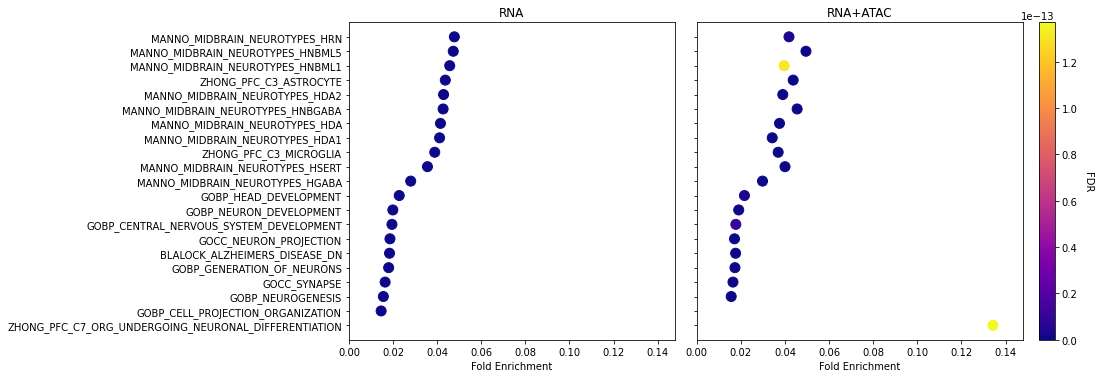

In [109]:
df0 = df_rna_1
df1 = df_result_1
title = '' # 'Terminal State 1'
fname = 'pathways_term_state_1.png'
neglog = False
plot_FDR_comparison(df0, df1, title, fname=fname, neglog=neglog, **plot_params)

Plot saved in pathways_term_state_1_neglog.png


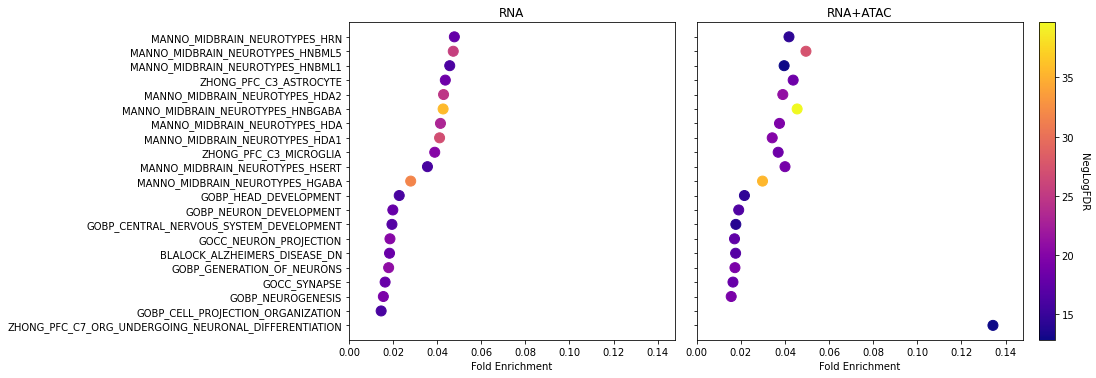

In [110]:
df0 = df_rna_1
df1 = df_result_1
title = '' # 'Terminal State 1'
fname = 'pathways_term_state_1_neglog.png'
neglog = True
plot_FDR_comparison(df0, df1, title, fname=fname, neglog=neglog, **plot_params)

### Used to produce tables in latex

In [5]:
df_rna_0 = get_df('GSEA_overlap_rna_0.tsv')
df_result_0 = get_df('GSEA_overlap_result_0.tsv')
df_rna_1 = get_df('GSEA_overlap_rna_1.tsv')
df_result_1 = get_df('GSEA_overlap_result_1.tsv')

list_df = [df_rna_0, df_result_0, df_rna_1, df_result_1]

In [163]:
df_rna_0[df_rna_0['Gene Set Name'].isin(missing_gsn_in_1)]['k/K'].mean()

0.0523

In [164]:
df_result_0[df_result_0['Gene Set Name'].isin(missing_gsn_in_0)]['k/K'].mean()

0.053759999999999995

In [165]:
df_result_1

,Gene Set Name,k/K,FDR q-value,neglog_FDR
0,MANNO_MIDBRAIN_NEUROTYPES_HNBGABA,0.0455,2.240000e-40,39.649752
1,MANNO_MIDBRAIN_NEUROTYPES_HGABA,0.0298,3.460000e-36,35.460924
2,MANNO_MIDBRAIN_NEUROTYPES_HNBML5,0.0495,4.230000e-28,27.373660
3,MANNO_MIDBRAIN_NEUROTYPES_HDA2,0.0390,8.440000e-22,21.073658
4,MANNO_MIDBRAIN_NEUROTYPES_HDA1,0.0342,9.010000e-21,20.045275
5,MANNO_MIDBRAIN_NEUROTYPES_HDA,0.0375,2.380000e-20,19.623423
6,GOBP_GENERATION_OF_NEURONS,0.0173,4.100000e-20,19.387216
7,GOBP_NEUROGENESIS,0.0156,4.610000e-20,19.336299
8,MANNO_MIDBRAIN_NEUROTYPES_HSERT,0.0400,9.840000e-20,19.007005
9,ZHONG_PFC_C3_MICROGLIA,0.0369,3.570000e-19,18.447332


In [157]:
gsn_0 = list(df_rna_0['Gene Set Name'].values)
gsn_1 = list(df_result_0['Gene Set Name'].values)

common_gsn = sorted(set(gsn_0).intersection(gsn_1) )
missing_gsn_in_0 = sorted(set(gsn_1) - set(gsn_0) )
missing_gsn_in_1 = sorted(set(gsn_0) - set(gsn_1) )

In [135]:
common_gsn += [' ']*(20-len(common_gsn))
missing_gsn_in_0 += [' ']*(20-len(missing_gsn_in_0))
missing_gsn_in_1 += [' ']*(20-len(missing_gsn_in_1))

In [136]:
for x,y,z in zip(common_gsn, missing_gsn_in_0, missing_gsn_in_1):
    print(f'{x} & {y} & {z} \\\\'.replace('_', '-'))

BLALOCK-ALZHEIMERS-DISEASE-DN & ZHONG-PFC-C7-ORG-UNDERGOING-NEURONAL-DIFFERENTIATION & GOBP-CELL-PROJECTION-ORGANIZATION \\
GOBP-CENTRAL-NERVOUS-SYSTEM-DEVELOPMENT &   &   \\
GOBP-GENERATION-OF-NEURONS &   &   \\
GOBP-HEAD-DEVELOPMENT &   &   \\
GOBP-NEUROGENESIS &   &   \\
GOBP-NEURON-DEVELOPMENT &   &   \\
GOCC-NEURON-PROJECTION &   &   \\
GOCC-SYNAPSE &   &   \\
MANNO-MIDBRAIN-NEUROTYPES-HDA &   &   \\
MANNO-MIDBRAIN-NEUROTYPES-HDA1 &   &   \\
MANNO-MIDBRAIN-NEUROTYPES-HDA2 &   &   \\
MANNO-MIDBRAIN-NEUROTYPES-HGABA &   &   \\
MANNO-MIDBRAIN-NEUROTYPES-HNBGABA &   &   \\
MANNO-MIDBRAIN-NEUROTYPES-HNBML1 &   &   \\
MANNO-MIDBRAIN-NEUROTYPES-HNBML5 &   &   \\
MANNO-MIDBRAIN-NEUROTYPES-HRN &   &   \\
MANNO-MIDBRAIN-NEUROTYPES-HSERT &   &   \\
ZHONG-PFC-C3-ASTROCYTE &   &   \\
ZHONG-PFC-C3-MICROGLIA &   &   \\
  &   &   \\


In [147]:
print(*[x.replace('_', '-') for x in common_gsn], sep=' \\\\\n', end='\\\\\n')

BLALOCK-ALZHEIMERS-DISEASE-DN \\
GOBP-CENTRAL-NERVOUS-SYSTEM-DEVELOPMENT \\
GOBP-GENERATION-OF-NEURONS \\
GOBP-HEAD-DEVELOPMENT \\
GOBP-NEUROGENESIS \\
GOBP-NEURON-DEVELOPMENT \\
GOCC-NEURON-PROJECTION \\
GOCC-SYNAPSE \\
MANNO-MIDBRAIN-NEUROTYPES-HDA \\
MANNO-MIDBRAIN-NEUROTYPES-HDA1 \\
MANNO-MIDBRAIN-NEUROTYPES-HDA2 \\
MANNO-MIDBRAIN-NEUROTYPES-HGABA \\
MANNO-MIDBRAIN-NEUROTYPES-HNBGABA \\
MANNO-MIDBRAIN-NEUROTYPES-HNBML1 \\
MANNO-MIDBRAIN-NEUROTYPES-HNBML5 \\
MANNO-MIDBRAIN-NEUROTYPES-HRN \\
MANNO-MIDBRAIN-NEUROTYPES-HSERT \\
ZHONG-PFC-C3-ASTROCYTE \\
ZHONG-PFC-C3-MICROGLIA\\


In [148]:
print(*[x.replace('_', '-') for x in missing_gsn_in_0], sep=' \\\\\n', end=' \\\\\n')

ZHONG-PFC-C7-ORG-UNDERGOING-NEURONAL-DIFFERENTIATION \\


In [149]:
print(*[x.replace('_', '-') for x in missing_gsn_in_1], sep=' \\\\\n', end=' \\\\\n')

GOBP-CELL-PROJECTION-ORGANIZATION \\


In [121]:
for gsn in sorted(set(df_rna_1['Gene Set Name'].values).intersection(df_result_1['Gene Set Name'].values)):
    print(gsn)

BLALOCK_ALZHEIMERS_DISEASE_DN
GOBP_CENTRAL_NERVOUS_SYSTEM_DEVELOPMENT
GOBP_GENERATION_OF_NEURONS
GOBP_HEAD_DEVELOPMENT
GOBP_NEUROGENESIS
GOBP_NEURON_DEVELOPMENT
GOCC_NEURON_PROJECTION
GOCC_SYNAPSE
MANNO_MIDBRAIN_NEUROTYPES_HDA
MANNO_MIDBRAIN_NEUROTYPES_HDA1
MANNO_MIDBRAIN_NEUROTYPES_HDA2
MANNO_MIDBRAIN_NEUROTYPES_HGABA
MANNO_MIDBRAIN_NEUROTYPES_HNBGABA
MANNO_MIDBRAIN_NEUROTYPES_HNBML1
MANNO_MIDBRAIN_NEUROTYPES_HNBML5
MANNO_MIDBRAIN_NEUROTYPES_HRN
MANNO_MIDBRAIN_NEUROTYPES_HSERT
ZHONG_PFC_C3_ASTROCYTE
ZHONG_PFC_C3_MICROGLIA


In [6]:
df_rna_0.head()

,Gene Set Name,k/K,FDR q-value,neglog_FDR
0,ZHONG_PFC_MAJOR_TYPES_ASTROCYTES,0.1043,3.070000e-56,55.512862
1,MANNO_MIDBRAIN_NEUROTYPES_HRGL2A,0.0517,8.050000e-41,40.094204
2,FAN_EMBRYONIC_CTX_BIG_GROUPS_GLIAL,0.1654,1.180000e-38,37.928118
3,MANNO_MIDBRAIN_NEUROTYPES_HRGL2B,0.0592,8.960000e-35,34.047692
4,ZHONG_PFC_C9_ORG_OTHER,0.2169,2.720000e-33,32.565431


## Figures not used

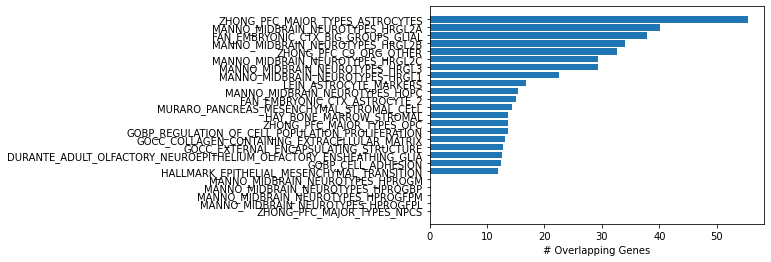

In [7]:
fig, ax = plt.subplots()

missing_rna_0 = set(df_result_0['Gene Set Name'].values) - set(df_rna_0['Gene Set Name'].values) 

x = list(df_rna_0['Gene Set Name'].values)
heights = list(df_rna_0['neglog_FDR'].values)

for gsn in missing_rna_0:
    x.append(gsn)
    heights.append(0)
y_pos = np.arange(len(x))

ax.barh(y_pos, heights, align='center')
ax.set_yticks(y_pos, labels=x)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('# Overlapping Genes')
plt.show()

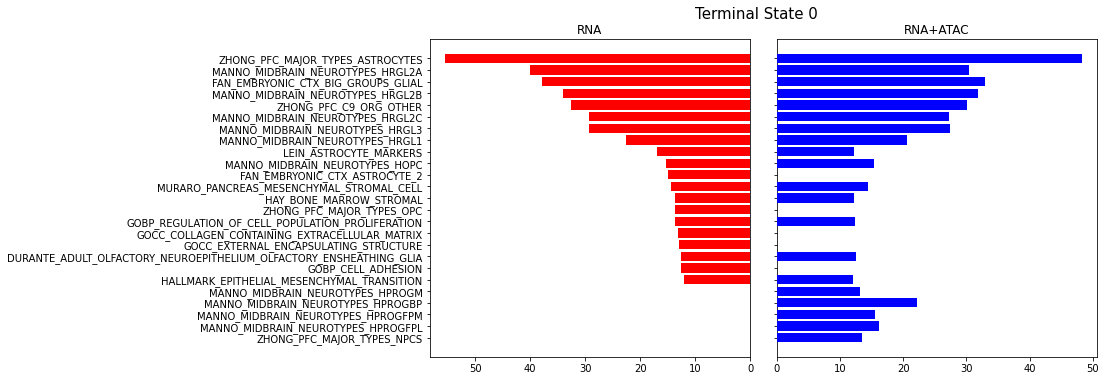

In [8]:
df0 = df_rna_0
df1 = df_result_0

fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()

index = list(df0['Gene Set Name'].values)
column0 = list(df0['neglog_FDR'].values)
gsn_1 = list(df1['Gene Set Name'].values)

missing_gsn = set(df1['Gene Set Name'].values) - set(df0['Gene Set Name'].values) 

for gsn in missing_gsn:
    index.append(gsn)
    column0.append(0)

column1 = []
for gsn in index:
    if gsn in gsn_1:
        column1.append(df_result_0[df_result_0['Gene Set Name'] == gsn]['neglog_FDR'].iloc[0])
    else:
        column1.append(0)

axes[0].barh(index, column0, align='center', color='red', zorder=10)
axes[0].set_title('RNA') #, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color='blue', zorder=10)
axes[1].set_title('RNA+ATAC') #, fontsize=18, pad=15, color=color_blue, **hfont)

# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis()

# To show data from highest to lowest
plt.gca().invert_yaxis()

axes[0].set(yticks=index, yticklabels=index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y') #, colors='white') # tick color

#for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
#    label.set(fontsize=13) #, color=font_color, **hfont)
#for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
#    label.set(fontsize=13) #, color=font_color, **hfont)

plt.suptitle('Terminal State 0', y=1.05, fontsize=15)

plt.show()

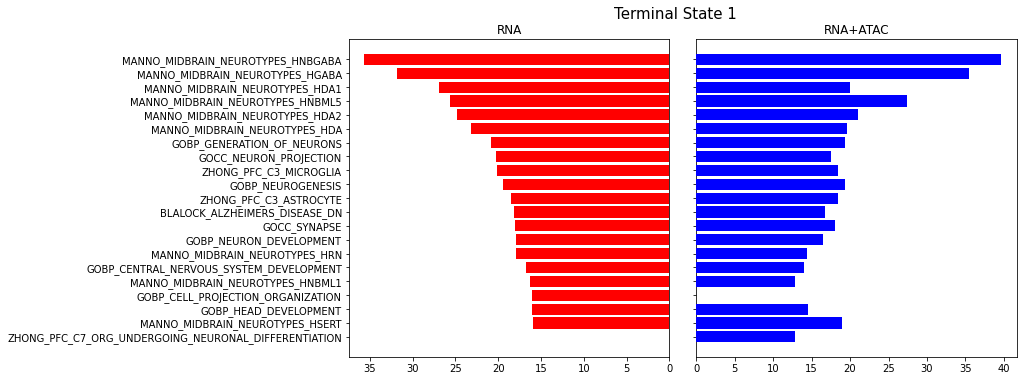

In [9]:
df0 = df_rna_1
df1 = df_result_1

fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()

index = list(df0['Gene Set Name'].values)
column0 = list(df0['neglog_FDR'].values)
gsn_1 = list(df1['Gene Set Name'].values)

missing_gsn = set(df1['Gene Set Name'].values) - set(df0['Gene Set Name'].values) 

for gsn in missing_gsn:
    index.append(gsn)
    column0.append(0)

column1 = []
for gsn in index:
    if gsn in gsn_1:
        column1.append(df1[df1['Gene Set Name'] == gsn]['neglog_FDR'].iloc[0])
    else:
        column1.append(0)

axes[0].barh(index, column0, align='center', color='red', zorder=10)
axes[0].set_title('RNA') #, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color='blue', zorder=10)
axes[1].set_title('RNA+ATAC') #, fontsize=18, pad=15, color=color_blue, **hfont)

# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis()

# To show data from highest to lowest
plt.gca().invert_yaxis()

axes[0].set(yticks=index, yticklabels=index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y') #, colors='white') # tick color

#for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
#    label.set(fontsize=13) #, color=font_color, **hfont)
#for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
#    label.set(fontsize=13) #, color=font_color, **hfont)

plt.suptitle('Terminal State 1', y=1.05, fontsize=15)

plt.show()

<ipython-input-10-34dc17401dcc>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(index)


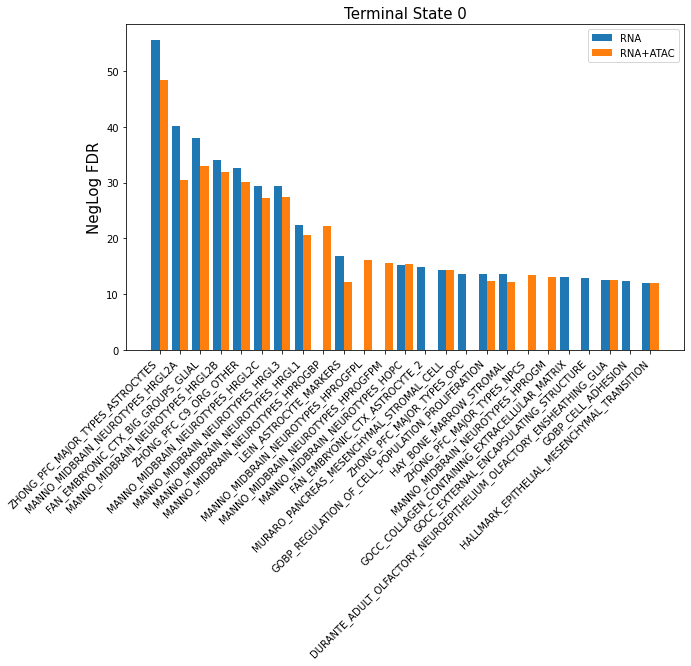

In [10]:
df0 = df_rna_0
df1 = df_result_0

gsn_0 = list(df0['Gene Set Name'].values)
gsn_1 = list(df1['Gene Set Name'].values)

common_gsn = set(gsn_0).intersection(gsn_1)
missing_gsn_in_0 = set(gsn_1) - set(gsn_0) 
missing_gsn_in_1 = set(gsn_0) - set(gsn_1) 

index = []
for gsn in common_gsn:
    index.append(gsn)

for gsn in missing_gsn_in_1:
    index.append(gsn)

for gsn in missing_gsn_in_0:
    index.append(gsn)

column0 = []
for gsn in index:
    if gsn in gsn_0:
        column0.append(df0[df0['Gene Set Name'] == gsn]['neglog_FDR'].iloc[0])
    else:
        column0.append(0)

column1 = []
for gsn in index:
    if gsn in gsn_1:
        column1.append(df1[df1['Gene Set Name'] == gsn]['neglog_FDR'].iloc[0])
    else:
        column1.append(0)

idx_sort = np.argsort(np.max(np.vstack([np.array(column0), np.array(column1)]), axis=0), axis=0)[::-1]
column0 = np.array(column0)[idx_sort]
column1 = np.array(column1)[idx_sort]
index = np.array(index)[idx_sort]

x_axis = np.arange(len(index))

fig, ax = plt.subplots(figsize=(10,6))
# Multi bar Chart
plt.bar(x_axis -0.2, column0, width=0.4, label = 'RNA')
plt.bar(x_axis +0.2, column1, width=0.4, label = 'RNA+ATAC')
ax.set_xticklabels(index)
plt.xticks(x_axis, rotation=45, ha="right")

plt.title('Terminal State 0', fontsize=15)
plt.legend()
plt.ylabel('NegLog FDR', fontsize=15)
plt.show()

<ipython-input-11-de3059573589>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(index)


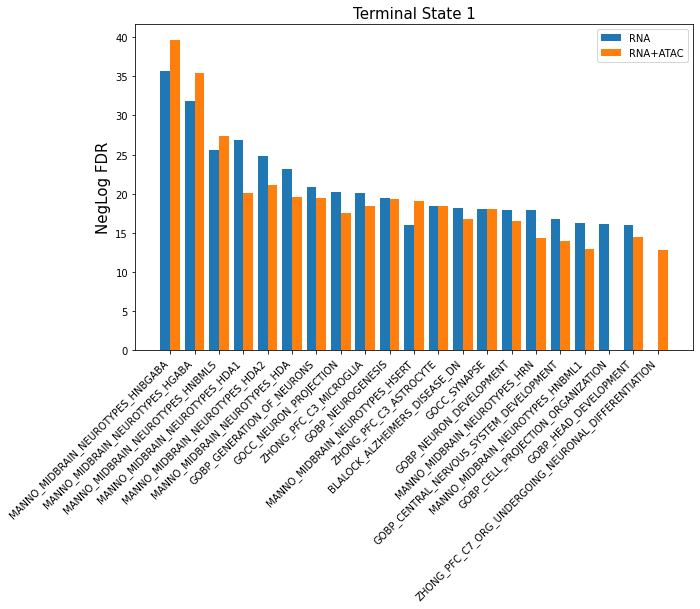

In [11]:
df0 = df_rna_1
df1 = df_result_1

gsn_0 = list(df0['Gene Set Name'].values)
gsn_1 = list(df1['Gene Set Name'].values)

common_gsn = set(gsn_0).intersection(gsn_1)
missing_gsn_in_0 = set(gsn_1) - set(gsn_0) 
missing_gsn_in_1 = set(gsn_0) - set(gsn_1) 

index = []
for gsn in common_gsn:
    index.append(gsn)

for gsn in missing_gsn_in_1:
    index.append(gsn)

for gsn in missing_gsn_in_0:
    index.append(gsn)

column0 = []
for gsn in index:
    if gsn in gsn_0:
        column0.append(df0[df0['Gene Set Name'] == gsn]['neglog_FDR'].iloc[0])
    else:
        column0.append(0)

column1 = []
for gsn in index:
    if gsn in gsn_1:
        column1.append(df1[df1['Gene Set Name'] == gsn]['neglog_FDR'].iloc[0])
    else:
        column1.append(0)

idx_sort = np.argsort(np.max(np.vstack([np.array(column0), np.array(column1)]), axis=0), axis=0)[::-1]
column0 = np.array(column0)[idx_sort]
column1 = np.array(column1)[idx_sort]
index = np.array(index)[idx_sort]

x_axis = np.arange(len(index))

fig, ax = plt.subplots(figsize=(10,6))
# Multi bar Chart
plt.bar(x_axis -0.2, column0, width=0.4, label = 'RNA')
plt.bar(x_axis +0.2, column1, width=0.4, label = 'RNA+ATAC')
ax.set_xticklabels(index)
plt.xticks(x_axis, rotation=45, ha="right")

plt.title('Terminal State 1', fontsize=15)
plt.legend()
plt.ylabel('NegLog FDR', fontsize=15)
plt.show()

### For the final presentation

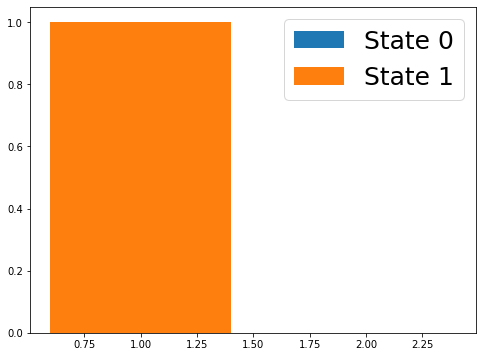

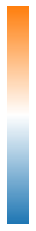

In [20]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(8,6))
plt.bar([1,2], [1,0], label='State 0')
plt.bar([1,2], [1,0], label='State 1')
plt.legend(fontsize=25)
plt.show()

colors = [u'#ff7f0e', u'#ffffff', u'#1f77b4'] # orange, white, blue
cm = LinearSegmentedColormap.from_list("Custom", colors, N=200)
mat = np.indices((100,1000))[1]
plt.imshow(mat.T, cmap=cm)
plt.axis('off')
plt.show()